In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Import data and perform EDA
crime_data = pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-7/crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
# scaling the data
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_data.iloc[:,1:])
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [59]:
scaled_df = pd.DataFrame(data=scaled_data,columns=['Murder','Assault','UrbanPop','Rape'])
scaled_df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [68]:
# Hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

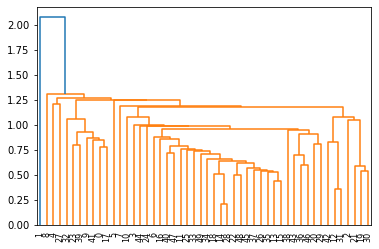

In [92]:
dendogram = sch.dendrogram(sch.linkage(scaled_df))

In [93]:
hc=AgglomerativeClustering(n_clusters=4, linkage='single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [94]:
y_hc = hc.fit_predict(scaled_df)
y_hc

array([0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [96]:
clusters = pd.DataFrame(data=y_hc, columns=['clusters'])
clusters.head()

,clusters
0,0
1,3
2,0
3,0
4,1


In [97]:
crime_data_agglo = crime_data.copy()
crime_data_agglo['clusters'] = clusters
crime_data_agglo.sort_values(by='clusters',ascending=False)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
1,Alaska,10.0,263,48,44.5,3
8,Florida,15.4,335,80,31.9,2
4,California,9.0,276,91,40.6,1
27,Nevada,12.2,252,81,46.0,1
37,Pennsylvania,6.3,106,72,14.9,0
28,New Hampshire,2.1,57,56,9.5,0
29,New Jersey,7.4,159,89,18.8,0
30,New Mexico,11.4,285,70,32.1,0
31,New York,11.1,254,86,26.1,0
32,North Carolina,13.0,337,45,16.1,0


In [140]:
crime_data_agglo.groupby('clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
0,7.452174,161.130435,64.717391,19.534783
1,10.600000,264.000000,86.000000,43.300000
2,15.400000,335.000000,80.000000,31.900000
3,10.000000,263.000000,48.000000,44.500000


In [69]:
# kmeans clustering
from sklearn.cluster import KMeans

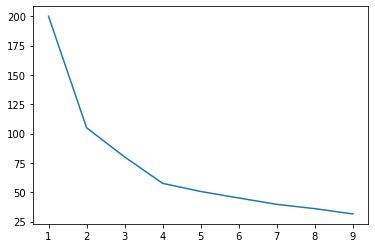

In [71]:
wcss = []

for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)      # The elbow curve showing the gradual decrease at 4 in x axis
    
plt.plot(range(1,10),wcss)
plt.show() 

In [115]:
# Building alogorithm
clusters_kmeans = KMeans(n_clusters=4,random_state=2)
clusters_kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=2)

In [117]:
clusters_kmeans.labels_

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [118]:
clusters_k = pd.DataFrame(clusters_kmeans.labels_, columns= ['clusters'])
clusters_k.head()

,clusters
0,2
1,3
2,3
3,2
4,3


In [120]:
crime_data_kmeans = crime_data.copy()
crime_data_kmeans['clusters'] = clusters_k
crime_data_kmeans.sort_values(by='clusters', ascending=False)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
30,New Mexico,11.4,285,70,32.1,3
21,Michigan,12.1,255,74,35.1,3
8,Florida,15.4,335,80,31.9,3
31,New York,11.1,254,86,26.1,3
19,Maryland,11.3,300,67,27.8,3
42,Texas,12.7,201,80,25.5,3


In [141]:
crime_data_kmeans.groupby('clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
0,5.852941,141.176471,73.647059,19.335294
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,10.966667,264.000000,76.500000,33.608333


In [121]:
# dbscan clustering
from sklearn.cluster import DBSCAN

In [134]:
dbscan = DBSCAN(min_samples=4,eps=1)
dbscan.fit(scaled_df)


DBSCAN(eps=1, min_samples=4)

In [135]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [136]:
clusters_d = pd.DataFrame(dbscan.labels_, columns= ['clusters'])
clusters_d.head()

,clusters
0,0
1,-1
2,-1
3,-1
4,-1


In [139]:
crime_data_dbscan = crime_data.copy()
crime_data_dbscan['clusters'] = clusters_d
crime_data_dbscan.sort_values(by='clusters', ascending=False)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
25,Montana,6.0,109,53,16.4,1
20,Massachusetts,4.4,149,85,16.3,1
24,Missouri,9.0,178,70,28.2,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
29,New Jersey,7.4,159,89,18.8,1
33,North Dakota,0.8,45,44,7.3,1
34,Ohio,7.3,120,75,21.4,1
35,Oklahoma,6.6,151,68,20.0,1
36,Oregon,4.9,159,67,29.3,1


In [142]:
crime_data_dbscan.groupby('clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143
